## Task 30

### RNN

#### Preparing The IMDB Data

In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


#### Training The Model With ```Embedding``` And ```SimpleRNN``` Layers

In [6]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding,SimpleRNN

model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(input_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 16s 92ms/step - loss: 0.6102 - acc: 0.6467 - val_loss: 0.5665 - val_acc: 0.7054
Epoch 2/10
157/157 [==============================] - 14s 87ms/step - loss: 0.3815 - acc: 0.8367 - val_loss: 0.3899 - val_acc: 0.8334
Epoch 3/10
157/157 [==============================] - 13s 83ms/step - loss: 0.2926 - acc: 0.8863 - val_loss: 0.3764 - val_acc: 0.8484
Epoch 4/10
157/157 [==============================] - 13s 84ms/step - loss: 0.2490 - acc: 0.9008 - val_loss: 0.6496 - val_acc: 0.7782
Epoch 5/10
157/157 [==============================] - 13s 84ms/step - loss: 0.1974 - acc: 0.9261 - val_loss: 0.3771 - val_acc: 0.8362
Epoch 6/10
157/157 [==============================] - 17s 108ms/step - loss: 0.1554 - acc: 0.9452 - val_loss: 0.3754 - val_acc: 0.8622
Epoch 7/10
157/157 [==============================] - 15s 98ms/step - loss: 0.1162 - acc: 0.9617 - val_loss: 0.4265 - val_acc: 0.8642
Epoch 8/10
157/157 [==============================] - 14s 86m

#### Plotting The Results

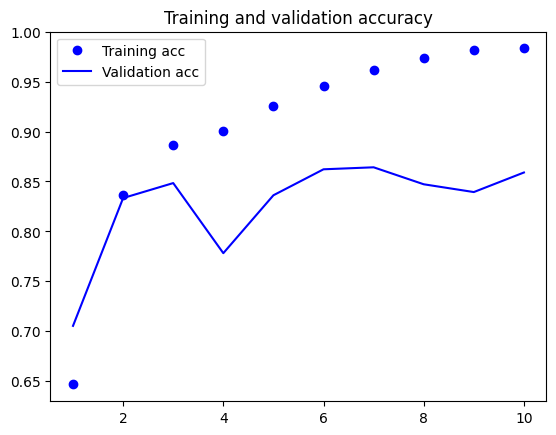

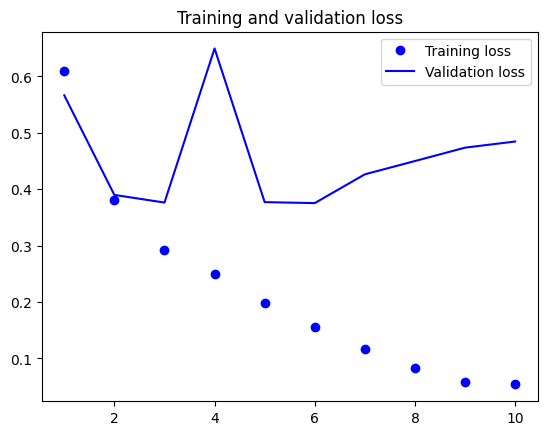

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss=history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


### LSTM

#### Using The LSTM Layer in Keras

In [8]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history = model.fit(input_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 37s 222ms/step - loss: 0.5934 - acc: 0.6697 - val_loss: 0.4579 - val_acc: 0.7900
Epoch 2/10
157/157 [==============================] - 31s 197ms/step - loss: 0.3569 - acc: 0.8562 - val_loss: 0.3383 - val_acc: 0.8600
Epoch 3/10
157/157 [==============================] - 31s 194ms/step - loss: 0.2754 - acc: 0.8934 - val_loss: 0.3477 - val_acc: 0.8570
Epoch 4/10
157/157 [==============================] - 31s 200ms/step - loss: 0.2283 - acc: 0.9143 - val_loss: 0.3063 - val_acc: 0.8704
Epoch 5/10
157/157 [==============================] - 29s 183ms/step - loss: 0.2023 - acc: 0.9250 - val_loss: 0.2894 - val_acc: 0.8860
Epoch 6/10
157/157 [==============================] - 28s 177ms/step - loss: 0.1821 - acc: 0.9341 - val_loss: 0.3241 - val_acc: 0.8788
Epoch 7/10
157/157 [==============================] - 28s 179ms/step - loss: 0.1635 - acc: 0.9429 - val_loss: 0.3043 - val_acc: 0.8808
Epoch 8/10
157/157 [==============================] - 2

#### Plotting The Results

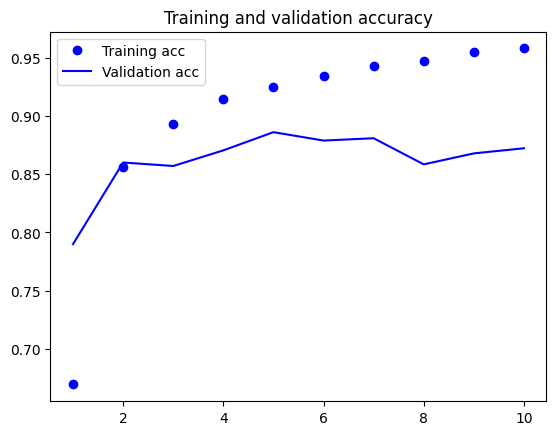

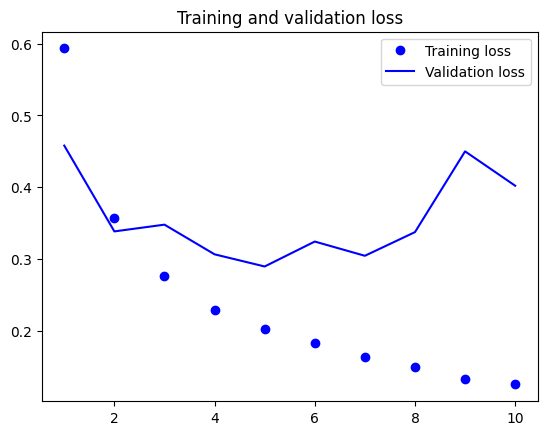

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss=history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()